# AOI01-Preprocessing
<img src="https://aidea-web.tw/images/5b04ebf7acca45000a7889ac/a49e3f76-69c9-4a4a-bcfc-c882840b3f27-small.png" width = "300" height = "200" alt="AOI" align="left" />



## AIdea AOI Hands-on workshop 
Please visit: https://aidea-web.tw/ and sign up an account.
* The open topic: Defect Classifications of AOI https://aidea-web.tw/topic/a49e3f76-69c9-4a4a-bcfc-c882840b3f27
* The AOI project for summer program  https://aidea-web.tw/topic/b4e83241-a385-4ff6-a5b8-82f3cc0ce6da

# Step 1: download aoi data
Yu can get the AOI dataset from the AIdea platform: https://aidea-web.tw/

Here is a local copy for fast download: http://summer.aiplab.net/aoi.zip

Unzip the aoi.zip into the Data folder

## Step 2: check the train/test datasets 

In [1]:
import pandas as pd

In [2]:
#train dataset
df = pd.read_csv('../Data/train.csv')
print(df.shape)

(2528, 2)


In [3]:
#test dataset
df2 = pd.read_csv('../Data/test.csv')
print(df2.shape)

(10142, 2)


In [4]:
train_labels = df.iloc[:,1].values
print(train_labels)

[0 1 1 ... 3 0 5]


## Step 3: View the train images

In [5]:
import imageio
import matplotlib.pyplot as plt
import numpy as np
import sys
%matplotlib inline

In [6]:
img = imageio.imread("../Data/train_images/train_00100.png")
print(img.shape)

(512, 512)


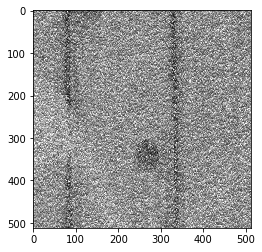

In [7]:
plt.imshow(img,cmap='gray')
plt.show()

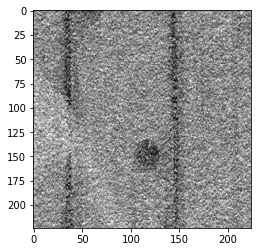

In [8]:
from PIL import Image
img = Image.open( "../Data/train_images/train_00100.png" )
img2=img.resize( (224, 224), Image.BILINEAR )
plt.imshow(img2,cmap='gray')
plt.show()

In [9]:
print (img2.size)


(224, 224)


## Step 4: Resize the train/test images by PIL

In [10]:
#Resize the train images-(1) PIL
from PIL import Image
maxTrainNum = 2528
for i in range(0,maxTrainNum):
    imgname="train_{0:0>5d}.png".format(i)
    imgname2 = "train_{0:0>5d}_224.png".format(i)
    img = Image.open("../Data/train_images" +'/'+ imgname)
    img2 = img.resize((224,224), Image.BILINEAR)
    img2.save("../Data/train_images" +'/'+ imgname2 )

In [11]:
#Resize the test images-(1) PIL
maxTestNum = 10142
for i in range(0,maxTrainNum):
    imgname="test_{0:0>5d}.png".format(i)
    imgname2 = "test_{0:0>5d}_224.png".format(i)
    img = Image.open("../Data/test_images" +'/'+ imgname)
    img2 = img.resize((224,224), Image.BILINEAR)
    img2.save("../Data/test_images" +'/'+ imgname2 )

In [12]:
## Step 4: Resize the train/test images by OpenCV

In [19]:
#Resize the train images-(2) opencv
import cv2
from scipy.misc import imread, imresize, imsave
maxTrainNum = 2528
for i in range(0,maxTrainNum):
    imgname="train_{0:0>5d}.png".format(i)
    imgname2 = "train_{0:0>5d}_224.png".format(i)
    img = imageio.imread("../Data/train_images" +'/'+ imgname)
    img2 = cv2.resize(img ,(224,224), interpolation=cv2.INTER_AREA)
    cv2.imwrite("../Data/train_images"+'/'+ imgname2, img2)

In [20]:
#Resize the test images-(2) opencv
maxTestNum = 10142
for i in range(0,maxTestNum):
    imgname="test_{0:0>5d}.png".format(i)
    imgname2 = "test_{0:0>5d}_224.png".format(i)
    img = cv2.imread("../Data/test_images" +'/'+ imgname)
    img2 = cv2.resize(img ,(224,224), interpolation=cv2.INTER_AREA)
    cv2.imwrite("../Data/test_images"+'/'+ imgname2, img2)